## 第七次练习

+ 请务必交到exer7文件夹下，**谢绝交到master下**
+ 请不要改动任何文件，拜托
+ 请在12月20日前提交。

请写一下姓名和学号：
+ 姓名  马梓城
+ 学号  0165265

In [24]:
import numpy as np
import pandas as pd

In [25]:
#请参考下面命令将CEPS.csv数据读入python

In [26]:
df = pd.read_csv('CEPS.csv',encoding='gb2312')
df.head()

C:\Users\EstebanMa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (20,22,23,25,28,29,39,49,74,124,125,126,127,128,129,130,131,138,140,141,147,160,161,162,165,170,174,175,176,177,179,180,181,182,183,184,188,191,194,195,196,199,221,222,223,224,251,252,254,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ids,clsids,schids,ctyids,frame,subsample,sweight,fall,grade9,stcog,...,steco_3c,stonly,stsib,stsibrank,stmedu,stfedu,stprhedu,stfdrunk,stprfight,stprrel
0,1,1,1,1,3,3,218.738892,0,0,11,...,3,1,,,3,3,3,1,1,2
1,2,1,1,1,3,3,216.518234,0,0,17,...,2,1,,,8,5,8,1,1,2
2,3,1,1,1,3,3,216.518234,0,0,12,...,2,2,1,3,3,3,3,1,1,1
3,4,1,1,1,3,3,218.738892,0,0,10,...,2,1,,,6,7,7,1,1,2
4,5,1,1,1,3,3,217.553040,0,0,10,...,3,1,,,7,8,8,1,1,2


下面的图都至少需要在图上标注：
+ 图标题
+ x轴标题
+ y轴标题
+ 适当修改x轴或者y轴的刻度及标签，使之清晰美观
+ 根据需要添加图例

In [27]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [28]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False 

### 散点图
反映期中考试标准化成绩语文（stdchn）和期中考试标准化成绩数学（stdmat）的相关关系

In [33]:
#不知为何，散点图总是实现不了......
fig=plt.figure()
ax1=fig.add_subplot(111)
plt.title("语文与数学成绩散点图", fontsize=16)
x=df.stdchn[:120]
y=df.stdmat[:120]

plt.xlabel('语文', fontsize=14)
ax1.xaxis.set_major_locator(MultipleLocator(5))
ax1.xaxis.set_major_formatter(FormatStrFormatter('%d'))
plt.ylabel('数学', fontsize=14)
ax1.yaxis.set_major_locator(MultipleLocator(10))
ax1.yaxis.set_major_formatter(FormatStrFormatter('%d'))

plt.scatter(x,y)
plt.show()

ValueError: First argument must be a sequence

### 饼图
对问题“你是独生子女吗”(b01)的回答有“是”和“否”两种回答，相应的数字分别是1和2。请画一个饼图反映二者的比例。

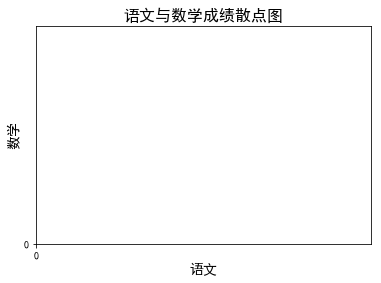

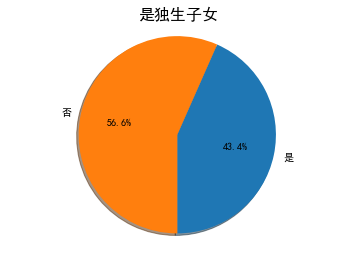

In [34]:
x=sum(df.b01==1)/(sum(df.b01==1)+sum(df.b01==2))
y=sum(df.b01==2)/(sum(df.b01==1)+sum(df.b01==2))
sizes = [x,y]

fig2, ax2 = plt.subplots()
ax2.set_title("是独生子女", fontsize=16, loc='center')
ax2.pie(sizes, labels=['是', '否'], autopct='%.1f%%', shadow=True, startangle=-90)
plt.axis('equal')

plt.show()

### 直方图
反映变量“每天晚上睡多长时间-小时”(b18a)的分布情况。

C:\Users\EstebanMa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (20,22,23,25,28,29,39,49,74,124,125,126,127,128,129,130,131,138,140,141,147,160,161,162,165,170,174,175,176,177,179,180,181,182,183,184,188,191,194,195,196,199,221,222,223,224,251,252,254,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


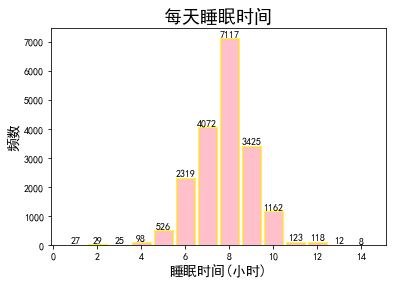

In [35]:
sentinels = {'b18a': [' ','0', '15','16','17','18','19', '20', '21', '22', '23', '24', '41']}
df = pd.read_csv('CEPS.csv',encoding='gb2312', na_values=sentinels)                          
df = pd.DataFrame(df)

Y = df['b18a'].value_counts().sort_index()

X = [i for i in range(1,15)]
plt.bar(X,Y,width = 0.85,facecolor = 'pink',edgecolor = 'yellow')

for x,y in zip(X,Y):
    plt.text(x, y, '%d' % y, ha='center', va= 'bottom')

plt.title("每天晚上睡眠时间", fontsize=18)
plt.xlabel("睡眠时间(小时)", fontsize=14)     
plt.ylabel("频数", fontsize=14)
plt.show()

### 柱图
反映变量"你妈妈是做什么工作的"(b08a)的职业分布情况，数字和编码关系如下：

+ 1	国家机关事业单位领导与工作人员
+ 2	企业/公司中高级管理人员
+ 3	教师、工程师、医生、律师
+ 4	技术工人（包括司机）
+ 5	生产与制造业一般职工
+ 6	商业与服务业一般职工
+ 7	个体户
+ 8	农民
+ 9 无业、失业、下岗


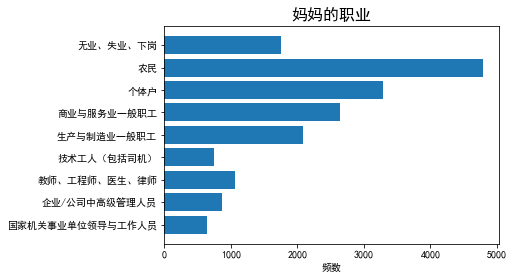

In [32]:
nums = []
for i in range(1, 10):
    nums.append(sum(df.b08a==str(i)))

names=['国家机关事业单位领导与工作人员','企业/公司中高级管理人员',
'教师、工程师、医生、律师','技术工人（包括司机）','生产与制造业一般职工',
'商业与服务业一般职工','个体户','农民','无业、失业、下岗']

plt.barh(range(len(nums)),nums,tick_label=names)
plt.title("妈妈的职业", fontsize=16)
plt.xlabel('频数')
plt.show()